In [ ]:
# our participant is 121, index [5] or 4?

In [1]:
# Additional imports
from datetime import datetime
import matplotlib.pyplot as plt
import pandas as pd

import sys
print(sys.executable)
#Check that we have something installed.
import nilearn

/work/sarah_a_folder/virt_env/bin/python3


In [2]:
from nilearn.glm.first_level import first_level_from_bids

#BIDS directory
data_dir='/work/816119/InSpePosNegData/BIDS_2023E/' 
# BIDS derivatives (contains preprocessed data)
derivatives_dir=  '/work/816119/InSpePosNegData/BIDS_2023E/derivatives'  

# Name for experiment in the BIDS directory
task_label = 'boldinnerspeech'
# Label for data that are spatially aligned to the MNI152 template (i.e. spatially normalised)
space_label ='MNI152NLin2009cAsym'
#Run the function that can gather all the needed info from a BIDS folder
models, models_run_imgs, models_events, models_confounds = \
    first_level_from_bids(
        data_dir, task_label, derivatives_folder=derivatives_dir, verbose=0,
        img_filters=[('desc', 'preproc')])

#Print the data from the first participant as sanity check

print(models_run_imgs[4])  # NB participant index

ValueError: 'dataset_path' does not exist:
/work/816119/InSpePosNegData/BIDS_2023E

In [24]:
# sanity check
from nilearn import image

#Get the full path
func01_path=([os.path.abspath(run) for run in models_run_imgs[4]]) # NB participant index
#Load the image and inspect data size
#func_img = image.load_img(func01_path)
#print("Shape of functional MRI image: %s" % (func_img.shape,)) 
# just ensure that the shape looks like this: functional MRI image: (78, 92, 78, 2940), which it does

In [25]:

confound_friston24 = ['trans_x','trans_y','trans_z',
                 'rot_x','rot_y','rot_z','trans_x_derivative1','trans_y_derivative1','trans_z_derivative1',
                 'rot_x_derivative1','rot_y_derivative1','rot_z_derivative1','trans_x_power2','trans_y_power2','trans_z_power2',
                 'rot_x_power2','rot_y_power2','rot_z_power2']

confound_friston24_GSR = ['global_signal','global_signal_derivative1','global_signal_power2','global_signal_derivative1_power2','trans_x','trans_y','trans_z',
                 'rot_x','rot_y','rot_z','trans_x_derivative1','trans_y_derivative1','trans_z_derivative1',
                 'rot_x_derivative1','rot_y_derivative1','rot_z_derivative1','trans_x_power2','trans_y_power2','trans_z_power2',
                 'rot_x_power2','rot_y_power2','rot_z_power2']
#
# Subset confounds with selection
for ii in range(len(models_confounds)):
    confounds1=models_confounds[ii][:].copy()
    for i in range(len(confounds1)):
        confounds2=confounds1[i].copy()
        confounds2=confounds2[confound_friston24_GSR]
        #Removing NAs in the first row.
        confounds2.loc[0,:]=confounds2.loc[1,:]
        confounds1[i]=confounds2
    models_confounds[ii][:]=confounds1


#Print new confounds, for our participant, first run
print(models_confounds[4][0].columns)  # NB participant index

now = datetime.now()
print('Finishing cell:',now.strftime("%H:%M:%S"))

Index(['global_signal', 'global_signal_derivative1', 'global_signal_power2',
       'global_signal_derivative1_power2', 'trans_x', 'trans_y', 'trans_z',
       'rot_x', 'rot_y', 'rot_z', 'trans_x_derivative1', 'trans_y_derivative1',
       'trans_z_derivative1', 'rot_x_derivative1', 'rot_y_derivative1',
       'rot_z_derivative1', 'trans_x_power2', 'trans_y_power2',
       'trans_z_power2', 'rot_x_power2', 'rot_y_power2', 'rot_z_power2'],
      dtype='object')
Finishing cell: 21:18:17


We want to be able to model 'other' condition. locate its presence in the event folder

- keep all labels (remove the replace stuff mikkel does), so that we can edit the contrast
- contrasts: self-other and positive-negative, plus the first, minus the other

In [26]:
print(models_events[1][0])

#Print model confounds for our participant, first run
print(models_events[4][0].columns)  # NB participant index

events_sub= ['onset','duration','trial_type']
print(len(models_events))

# Subset model events with selection
for ii in range(len(models_events)):
    events1=models_events[ii][:]
    for i in range(len(events1)):
        events2=events1[i]
        events2=events2[events_sub]
        events1[i]=events2
        #Rename trials to make contrasting easier
        events1[i].replace({'IMG_NS': 'NS', 'IMG_PS': 'PS', 'IMG_NO': 'NO', 'IMG_PO': 'PO','IMG_BI': 'B'}, inplace = True)

       
    models_events[ii][:]=events1
    
        
  
#Print new confounds, for our participant, first run
print(models_events[4][0].columns) # NB participant index

now = datetime.now()
print('Finishing cell:',now.strftime("%H:%M:%S"))

         onset  duration trial_type cued_word_pos cued_word_neg response  \
0     1.020684  0.683998     IMG_NS         smart          dumb      NaN   
1     6.321974  0.699943     IMG_BI         smart          dumb        b   
2    12.638653  0.700180     IMG_NS         smart          dumb      NaN   
3    17.955595  0.699861     IMG_BI         smart          dumb        b   
4    24.272967  0.699784     IMG_PS         smart          dumb      NaN   
..         ...       ...        ...           ...           ...      ...   
85  450.943761  0.699872     IMG_BI         smart          dumb        b   
86  457.261032  0.699568     IMG_BI         smart          dumb        b   
87  461.577604  0.700333     IMG_BI         smart          dumb        b   
88  467.894874  0.699702     IMG_PS         smart          dumb      NaN   
89  474.211758  0.700543     IMG_PS         smart          dumb      NaN   

          RT  run   ID             task  
0        NaN    1  116  boldinnerspeech  
1  

/tmp/ipykernel_558/2405100423.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  events1[i].replace({'IMG_NS': 'NS', 'IMG_PS': 'PS', 'IMG_NO': 'NO', 'IMG_PO': 'PO','IMG_BI': 'B'}, inplace = True)
/tmp/ipykernel_558/2405100423.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  events1[i].replace({'IMG_NS': 'NS', 'IMG_PS': 'PS', 'IMG_NO': 'NO', 'IMG_PO': 'PO','IMG_BI': 'B'}, inplace = True)
/tmp/ipykernel_558/2405100423.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexin

In [27]:
# How many events of each type?
print(models_events[4][2]['trial_type'].value_counts()) # NB participant index

trial_type
NS    30
PS    30
B     30
Name: count, dtype: int64


In [28]:
# Get data and model info for our participant
model1=models[4]  # NB participant index
imgs1=models_run_imgs[4]  # NB participant index
events1=models_events[4]  # NB participant index
confounds1=models_confounds[4]  # NB participant index

#confounds1[0,:]=confounds1[1,:]

#Fit the model - this will also generate a design matrix
model1.fit(imgs1,events1,confounds1)
#model1.zmap=model1.compute_contrast('IMG_BI')

now = datetime.now()
print('Finishing cell:',now.strftime("%H:%M:%S"))

/work/sarah_a_folder/virt_env/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:113: FutureWarning: The provided callable <function sum at 0x7f0fb8088e50> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass 'sum' instead.
  events_copy.groupby(COLUMN_DEFINING_EVENT_IDENTITY, sort=False)
/work/sarah_a_folder/virt_env/lib/python3.9/site-packages/nilearn/glm/_utils.py:319: UserWarning: Matrix is singular at working precision, regularizing...
  warn("Matrix is singular at working precision, regularizing...")
/work/sarah_a_folder/virt_env/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:113: FutureWarning: The provided callable <function sum at 0x7f0fb8088e50> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass 'sum' instead.
  events_copy.groupby(COLUMN_D

Finishing cell: 21:20:55


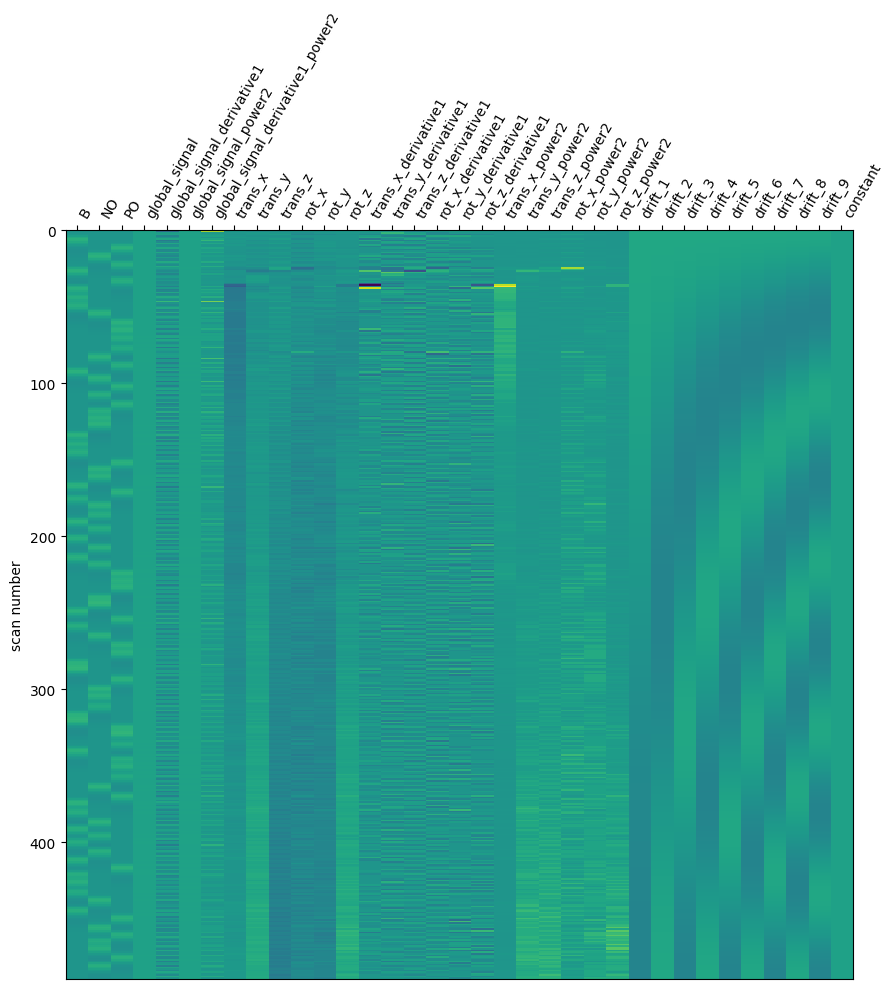

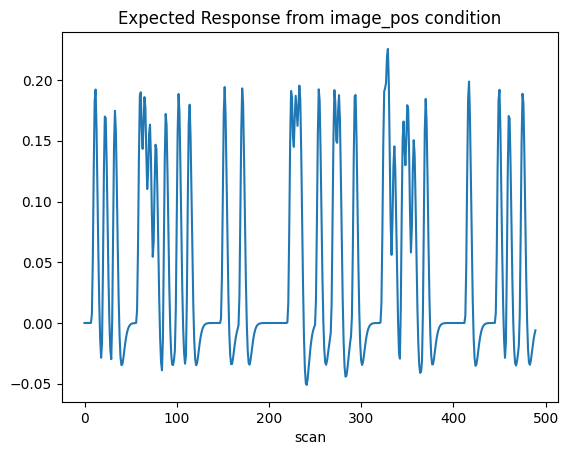

Finishing cell: 21:22:43


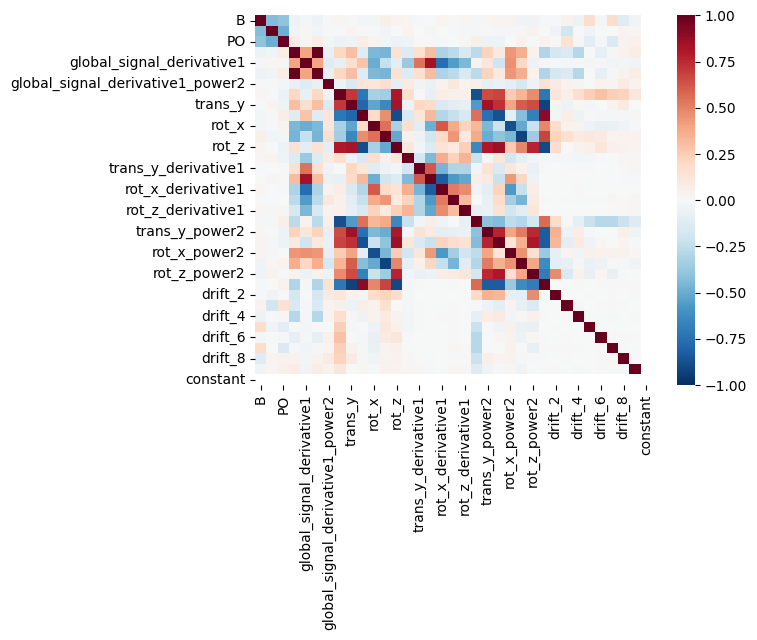

In [29]:
from nilearn.plotting import plot_design_matrix

# View the design matrix from the first session
design_matrix = model1.design_matrices_[1]

#Rename design matrix columns
#design_matrix.rename(columns={"IMG_BI":  "B","IMG_NS": "N", 'IMG_PS': 'P', 'IMG_NO': 'N', 'IMG_PO': 'P'}, inplace = True)

#Plot the design matrix
plot_design_matrix(design_matrix)
plt.show()

# Also plot time series
plt.plot(design_matrix['PO'])
plt.xlabel('scan')
plt.title('Expected Response from image_pos condition')
plt.show()


import seaborn as sns
sns.heatmap(design_matrix.corr(), vmin=-1, vmax=1, cmap='RdBu_r')

now = datetime.now()
print('Finishing cell:',now.strftime("%H:%M:%S"))

Finishing cell: 21:24:18


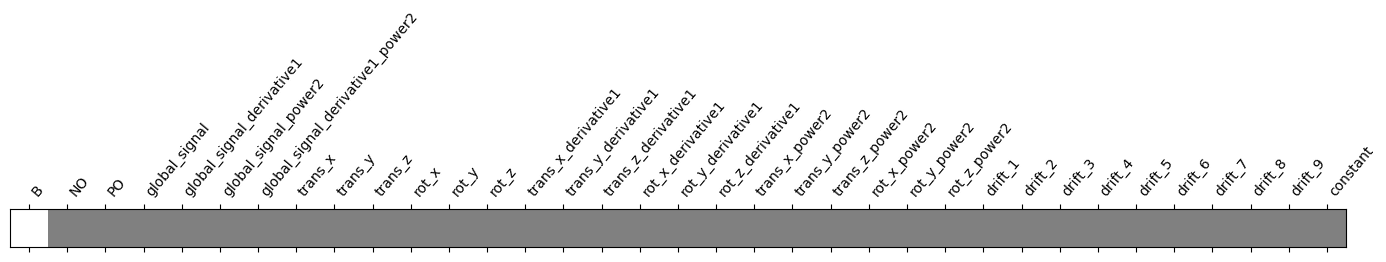

In [30]:
from nilearn.plotting import plot_contrast_matrix

#Define contrasts
contrasts=['B'] # We use the button press as a contrast, since we will collapse data in two different ways for the actual classification

# Plot them to see what they look like
for contrast in contrasts:
    plot_contrast_matrix(contrast, design_matrix=design_matrix)
    
now = datetime.now()
print('Finishing cell:',now.strftime("%H:%M:%S"))

In [31]:
from scipy.stats import norm
p001_unc = norm.isf(0.001)

/work/sarah_a_folder/virt_env/lib/python3.9/site-packages/nilearn/glm/first_level/first_level.py:706: UserWarning: One contrast given, assuming it for all 6 runs
  warn(f'One contrast given, assuming it for all {int(n_runs)} runs')


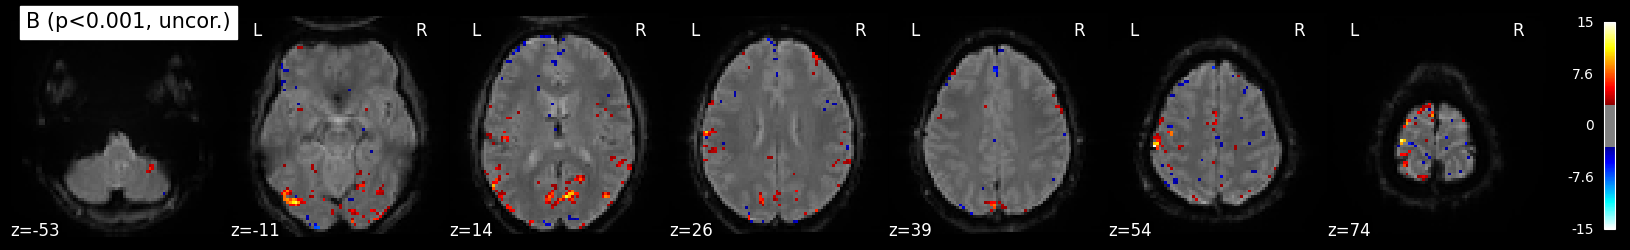

   Cluster ID          X           Y     Z  Peak Stat Cluster Size (mm3)
0           1 -56.084000  -28.933999  54.0  15.181175               1292
1          1a -45.980000  -39.037999  61.5   9.592918                   
2          1b -51.032000  -28.933999  49.0   7.417291                   
3          1c -40.927999  -36.511999  59.0   5.637712                   
4           2 -30.823999  -23.881999  74.0  12.858829                957
5          2a -43.454000  -21.355999  64.0  11.349519                   
6          2b -43.454000  -16.303999  56.5   9.606597                   
7          2c -35.875999  -16.303999  69.0   5.462279                   
8           3 -43.454000  -79.454000 -13.5  12.792672               1499
9          3a -51.032000  -76.927999  -3.5   9.883074                   
10         3b -45.980000  -69.349999 -11.0   8.516528                   
11         3c -40.927999  -66.823999  -1.0   5.328892                   
12          4 -33.349999  -64.297999 -18.5  11.8434

In [32]:
from nilearn.plotting import plot_stat_map
from nilearn.reporting import get_clusters_table
from nilearn.image import mean_img


# Make a mean image for display purposes
mean_img_ = mean_img(imgs1)

for contrast in contrasts:
    z_map = model1.compute_contrast(contrast, output_type='z_score')


    titlex=''.join([contrast, ' ', '(p<0.001, uncor.)'])
    plot_stat_map(z_map, bg_img=mean_img_, threshold=p001_unc,
              display_mode='z',  black_bg=True,
              title=titlex)
    plt.show()
    
    # Make a table of cluster coordinates.
    table = get_clusters_table(z_map, stat_threshold=p001_unc,
                           cluster_threshold=20)
    print(table)
    
now = datetime.now()
print('Finishing cell:',now.strftime("%H:%M:%S"))

In [33]:

from nilearn.reporting import make_glm_report
#Generate a report
report = make_glm_report(model1,
                         contrasts=contrasts,
                         threshold=p001_unc,
                         bg_img=mean_img_,
                         )
#Display report in HTML format
report

/work/sarah_a_folder/virt_env/lib/python3.9/site-packages/nilearn/reporting/utils.py:10: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  fig.savefig(
/work/sarah_a_folder/virt_env/lib/python3.9/site-packages/nilearn/glm/first_level/first_level.py:706: UserWarning: One contrast given, assuming it for all 6 runs
  warn(f'One contrast given, assuming it for all {int(n_runs)} runs')


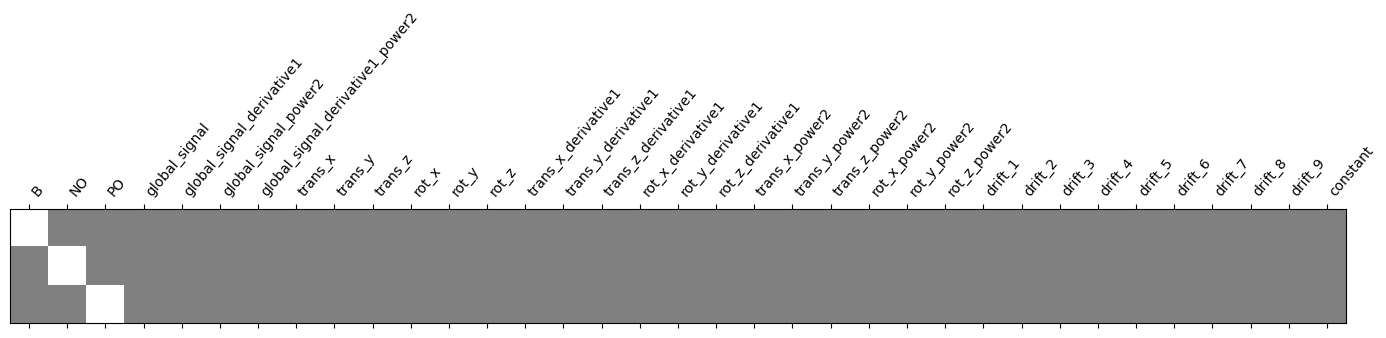

/work/sarah_a_folder/virt_env/lib/python3.9/site-packages/nilearn/glm/contrasts.py:348: UserWarning: Running approximate fixed effects on F statistics.
  warn('Running approximate fixed effects on F statistics.')


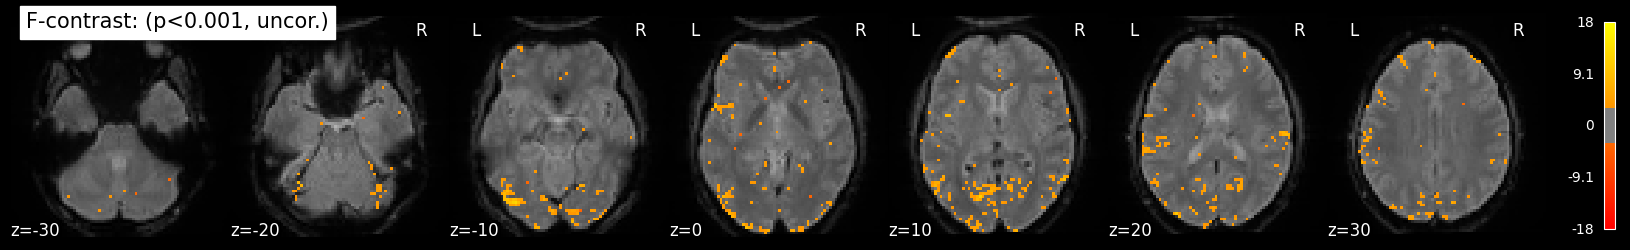

   Cluster ID          X          Y     Z  Peak Stat Cluster Size (mm3)
0           1 -56.084000 -28.933999  54.0  18.286218               5136
1          1a -30.823999 -23.881999  74.0  16.836037                   
2          1b -43.454000 -21.355999  64.0  15.119596                   
3          1c -20.719999 -21.355999  79.0  12.719241                   
4           2 -43.454000 -79.454000 -13.5  13.671980               1690
..        ...        ...        ...   ...        ...                ...
95         35 -51.032000 -46.615999   4.0   5.843862                462
96        35a -58.610000 -44.089999   1.5   5.516251                   
97         36  -0.511999 -81.980000   4.0   5.285169                334
98         37 -53.558000  19.060001  34.0   5.148580                494
99        37a -48.506000  26.638001  36.5   4.729432                   

[100 rows x 6 columns]


In [34]:
# f contrast
import numpy as np

#create a contrast matrix for the F-contrast, spanning the three first columns in the design matrix
effects_of_interest =np.identity(design_matrix.shape[1])[[0,1,2],:]

#Let's see what it looks like
plot_contrast_matrix(effects_of_interest, design_matrix)
plt.show()

#Similar to above, we will compute the effect
z_map = model1.compute_contrast(effects_of_interest,
                                  output_type='z_score')

#And plot the results using an overlay
plot_stat_map(z_map, bg_img=mean_img_, threshold=p001_unc, cmap='autumn',
              display_mode='z',  black_bg=True,cut_coords=[-30,-20,-10,0,10,20,30],
              title='F-contrast: (p<0.001, uncor.)')
plt.show()
    
# Make a table of cluster coordinates.
table = get_clusters_table(z_map, stat_threshold=p001_unc,
                           cluster_threshold=20)
print(table)

Starting cell: 21:26:31


/work/sarah_a_folder/virt_env/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:113: FutureWarning: The provided callable <function sum at 0x7f0fb8088e50> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass 'sum' instead.
  events_copy.groupby(COLUMN_DEFINING_EVENT_IDENTITY, sort=False)
/work/sarah_a_folder/virt_env/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:113: FutureWarning: The provided callable <function sum at 0x7f0fb8088e50> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass 'sum' instead.
  events_copy.groupby(COLUMN_DEFINING_EVENT_IDENTITY, sort=False)
/work/sarah_a_folder/virt_env/lib/python3.9/site-packages/nilearn/glm/first_level/first_level.py:75: UserWarning: Mean values of 0 observed.The data have probably been centered.Scaling m

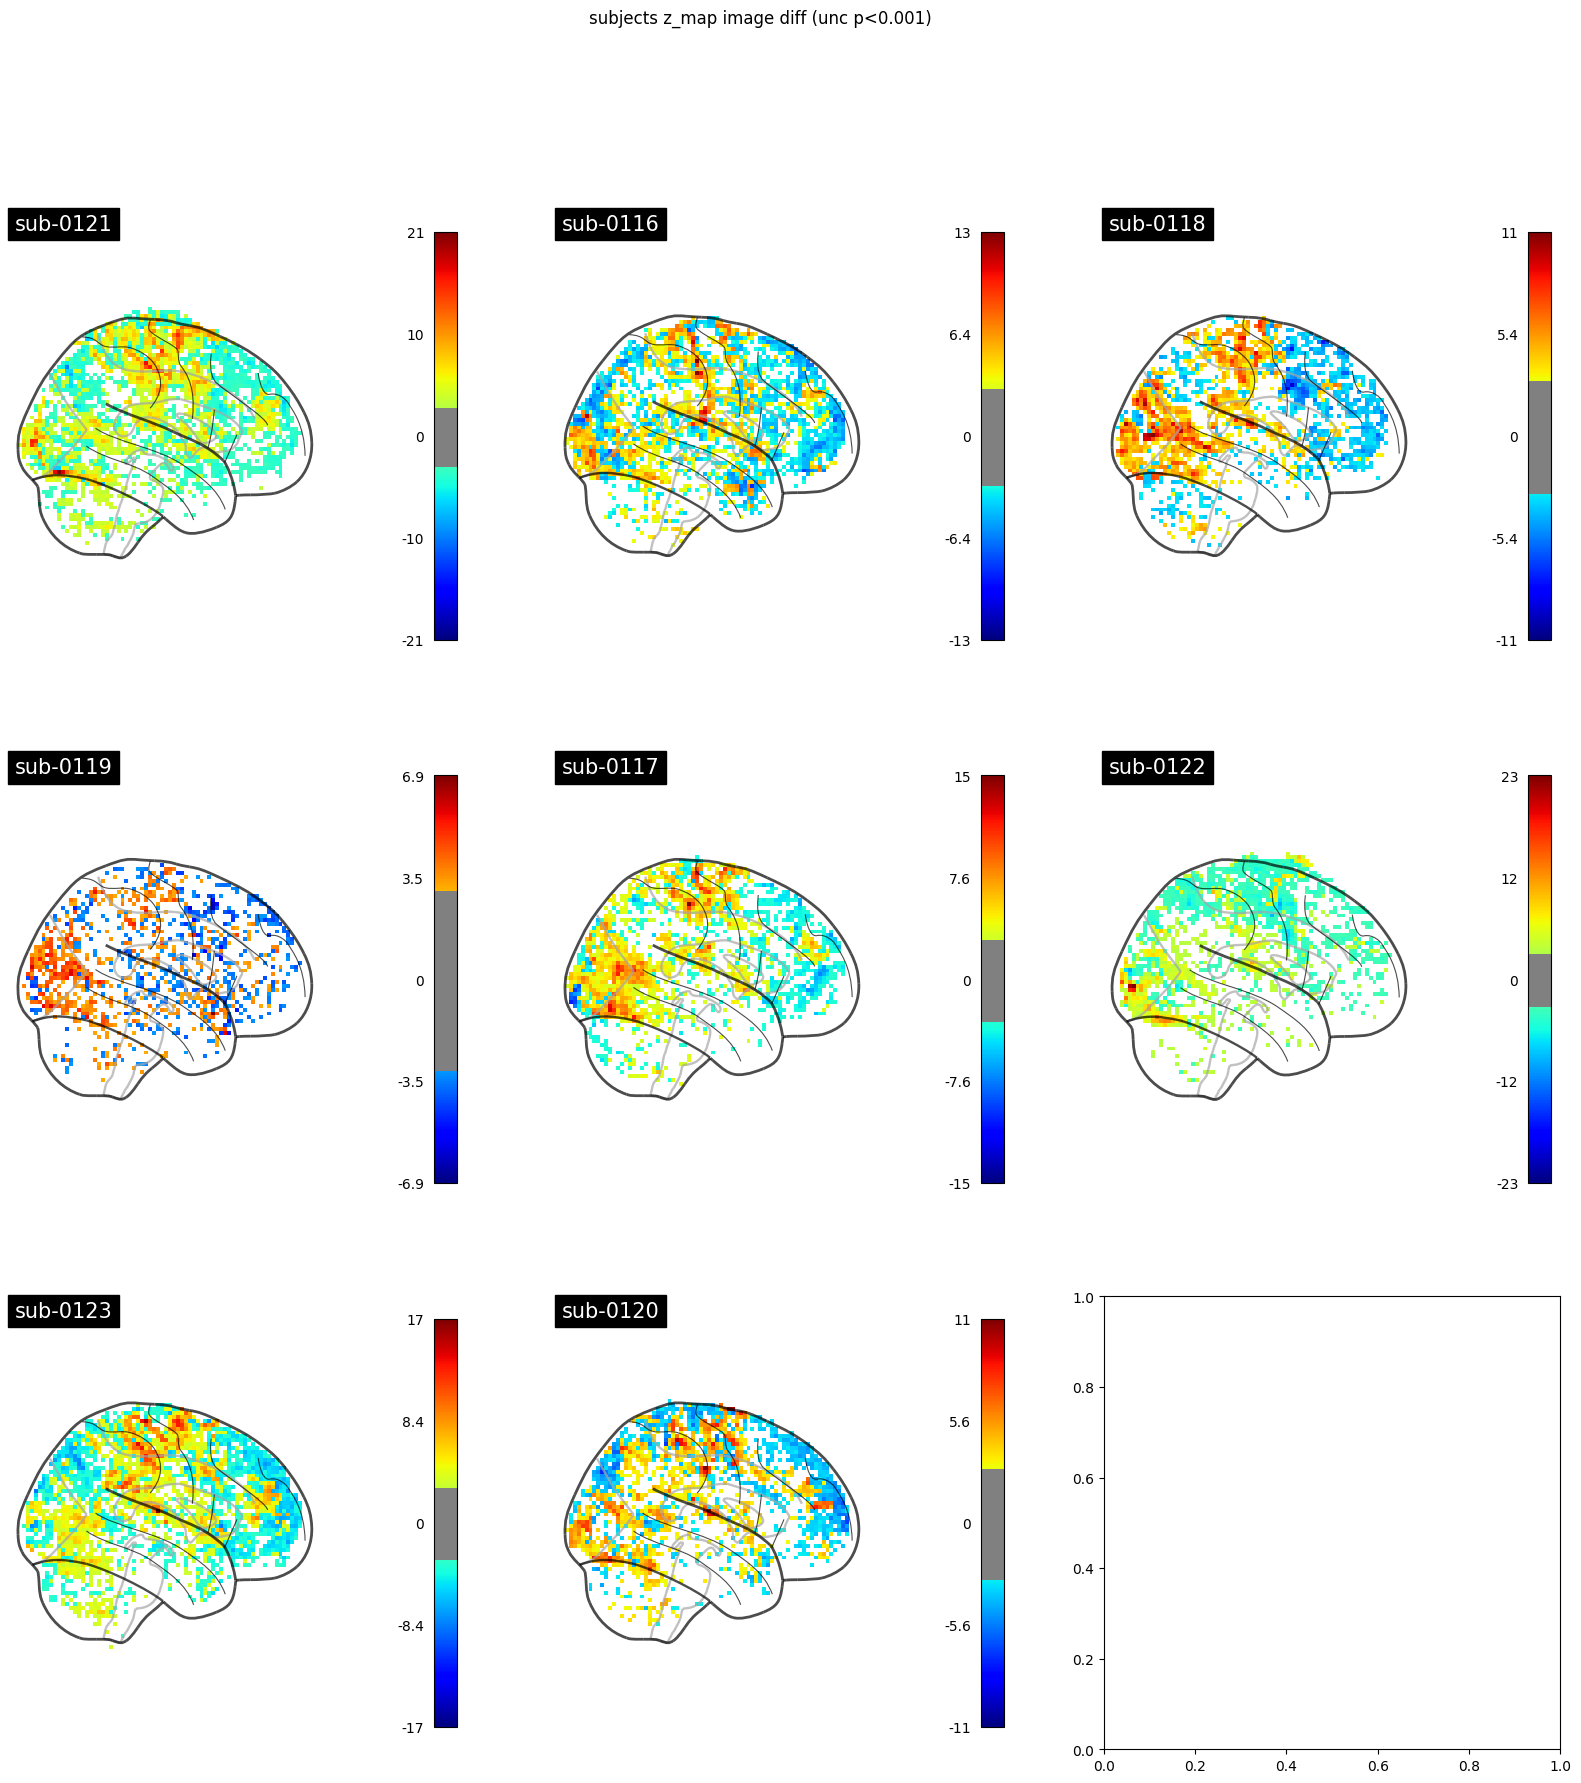

Finishing cell: 21:40:04


In [35]:
from nilearn import plotting
import matplotlib.pyplot as plt

now = datetime.now()
print('Starting cell:',now.strftime("%H:%M:%S"))

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(20, 20)) 
model_and_args = zip(models, models_run_imgs, models_events, models_confounds)
for m_idx, (model, imgs, events, confounds) in enumerate(model_and_args):
    # fit the GLM, recall that the model variable is a FirstLevelModel object
    model.fit(imgs, events, confounds)
    # compute the contrast of interest and make a map of z-values
    model.zmap = model.compute_contrast('B')
    #Plot each thresholded analysis
    plotting.plot_glass_brain(model.zmap, cmap='jet',colorbar=True, threshold=p001_unc,
                              title=('sub-' + model.subject_label),
                              axes=axes[int(m_idx / 3), int(m_idx % 3)],
                              plot_abs=False, display_mode='x')

   
fig.suptitle('subjects z_map image diff (unc p<0.001)')
plotting.show()

now = datetime.now()
print('Finishing cell:',now.strftime("%H:%M:%S"))

Notebook 16:

In [42]:
import pickle

#Save the first level models

# Saving the objects:
f = open('/work/sarah_a_folder/ass4/InSpe_first_level_models.pkl', 'wb')
pickle.dump([models, models_run_imgs, models_events, models_confounds], f)
f.close()

# Getting back the objects:
# f = open('/work/sarah_a_folder/ass4/InSpe_first_level_models.pkl', 'rb')
# models, models_run_imgs, models_events, models_confounds = pickle.load(f)
# f.close()

now = datetime.now()
print('Finishing cell:',now.strftime("%H:%M:%S"))

Finishing cell: 21:43:19


In [38]:
# Some debugging. What's in models_events?
# Inspect number of scans and confounds included in the first participant, first run:
print(models_confounds[0][0].shape)
# Inspect number of trials, onsets and trial types for the first participant, first run:
print(models_events[0])

(490, 22)
[         onset  duration trial_type
0     1.013844  0.686385         NS
1     6.316764  0.700265          B
2    12.633727  0.699903          B
3    16.950839  0.699904         NS
4    21.267711  0.700064          B
..         ...       ...        ...
85  452.938814  0.699962         PS
86  459.255915  0.699926          B
87  464.573453  0.699459         NS
88  470.890196  0.699384          B
89  475.206871  0.700277          B

[90 rows x 3 columns],          onset  duration trial_type
0     0.989434  0.684142         NO
1     6.290565  0.700036         PO
2    11.607257  0.700206         NO
3    16.924596  0.700024          B
4    23.241600  0.699647          B
..         ...       ...        ...
85  449.913042  0.699791          B
86  455.230046  0.699715         NO
87  461.546430  0.700200          B
88  467.864001  0.699375         NO
89  473.180465  0.699792         NO

[90 rows x 3 columns],          onset  duration trial_type
0     0.995372  0.681848         PS
1    

In [39]:
import pandas as pd
from nilearn.glm.first_level import make_first_level_design_matrix
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
get_ipython().run_line_magic('matplotlib', 'inline')

lsa_dm=[]

# Changing the model for a single participant (ours):
for ii in range(len(models_events[4])):  # NB participant index
    # Sort onsets by trial type to make later processing easier
    #models_events[0][ii].sort_values(by=['trial_type'], inplace=True)
    #N=number of events
    N=models_events[4][ii].shape[0]  # NB participant index
    # time frame with 490 scans with 1s TR:
    t_fmri = np.linspace(0, 490,490,endpoint=False)
    # We have to create a dataframe with onsets/durations/trial_types
    # No need for modulation!
    trials = pd.DataFrame(models_events[4][ii], columns=['onset'])  # NB participant index
    trials.loc[:, 'duration'] = 0.7
    trials.loc[:, 'trial_type'] = [models_events[4][ii]['trial_type'][i-1]+'_'+'t_'+str(i).zfill(3)  for i in range(1, N+1)] # NB participant index

    # lsa_dm = least squares all design matrix
    lsa_dm.append(make_first_level_design_matrix(
        frame_times=t_fmri,  # we defined this earlier 
        events=trials,
        add_regs=models_confounds[4][ii], #Add the confounds from fmriprep  # NB participant index
        hrf_model='glover',
        drift_model='cosine'  
    ))
    

now = datetime.now()
print('Finish making single trial models:',now.strftime("%H:%M:%S"))

/work/sarah_a_folder/virt_env/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:113: FutureWarning: The provided callable <function sum at 0x7f0fb8088e50> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass 'sum' instead.
  events_copy.groupby(COLUMN_DEFINING_EVENT_IDENTITY, sort=False)
/work/sarah_a_folder/virt_env/lib/python3.9/site-packages/nilearn/glm/_utils.py:319: UserWarning: Matrix is singular at working precision, regularizing...
  warn("Matrix is singular at working precision, regularizing...")
/work/sarah_a_folder/virt_env/lib/python3.9/site-packages/nilearn/glm/first_level/experimental_paradigm.py:113: FutureWarning: The provided callable <function sum at 0x7f0fb8088e50> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass 'sum' instead.
  events_copy.groupby(COLUMN_D

Finish making single trial models: 21:42:35


In [40]:
print(lsa_dm[4])

       B_t_002  B_t_007  B_t_008  B_t_009  B_t_017  B_t_018  B_t_020  B_t_030  \
0.0        0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
1.0        0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
2.0        0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
3.0        0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
4.0        0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
...        ...      ...      ...      ...      ...      ...      ...      ...   
485.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
486.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
487.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
488.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
489.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   

       B_t_032  B_t_033  ..

In [45]:
models

[FirstLevelModel(subject_label='0121', t_r=1),
 FirstLevelModel(subject_label='0116', t_r=1),
 FirstLevelModel(subject_label='0118', t_r=1),
 FirstLevelModel(subject_label='0119', t_r=1),
 FirstLevelModel(subject_label='0117', t_r=1),
 FirstLevelModel(subject_label='0122', t_r=1),
 FirstLevelModel(subject_label='0123', t_r=1),
 FirstLevelModel(subject_label='0120', t_r=1)]

Finishing cell: 21:45:37


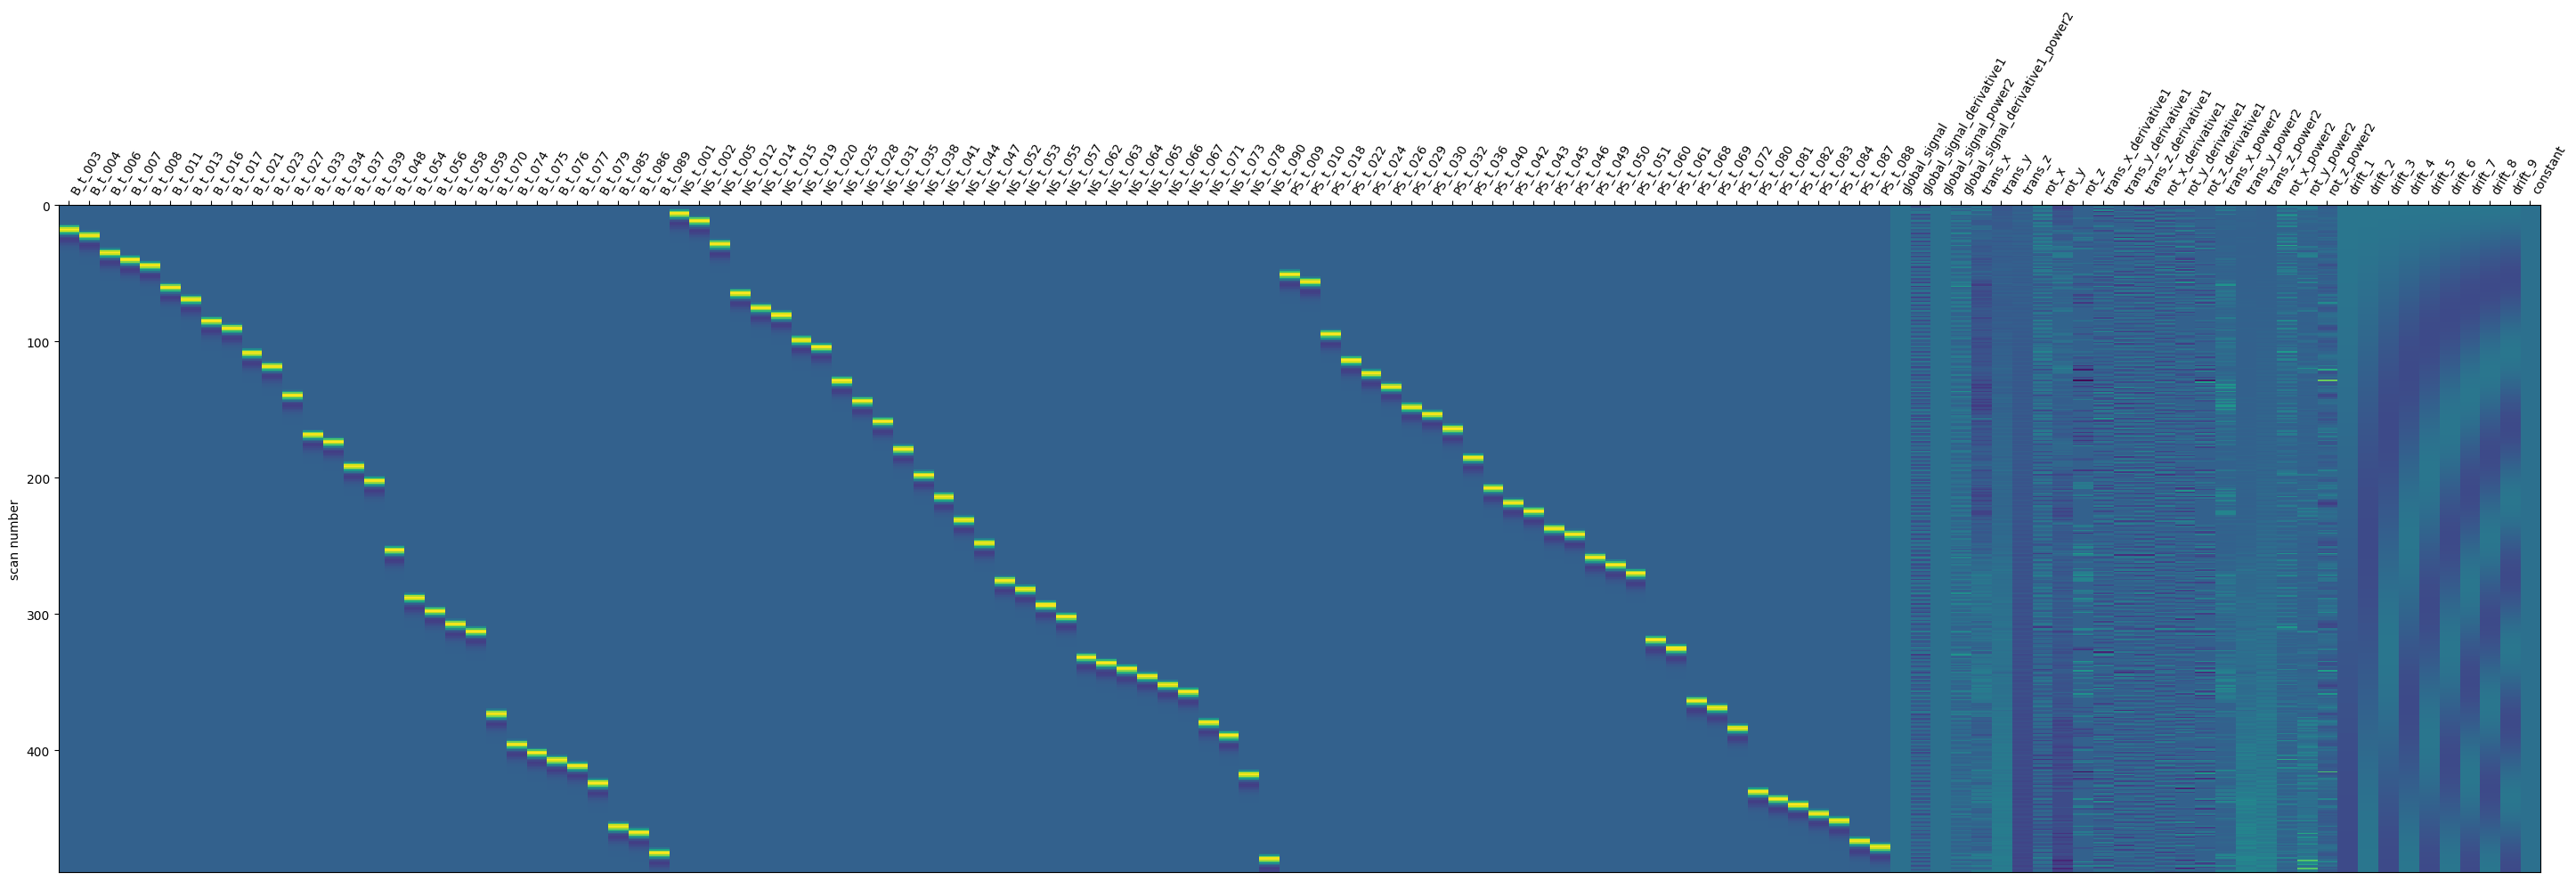

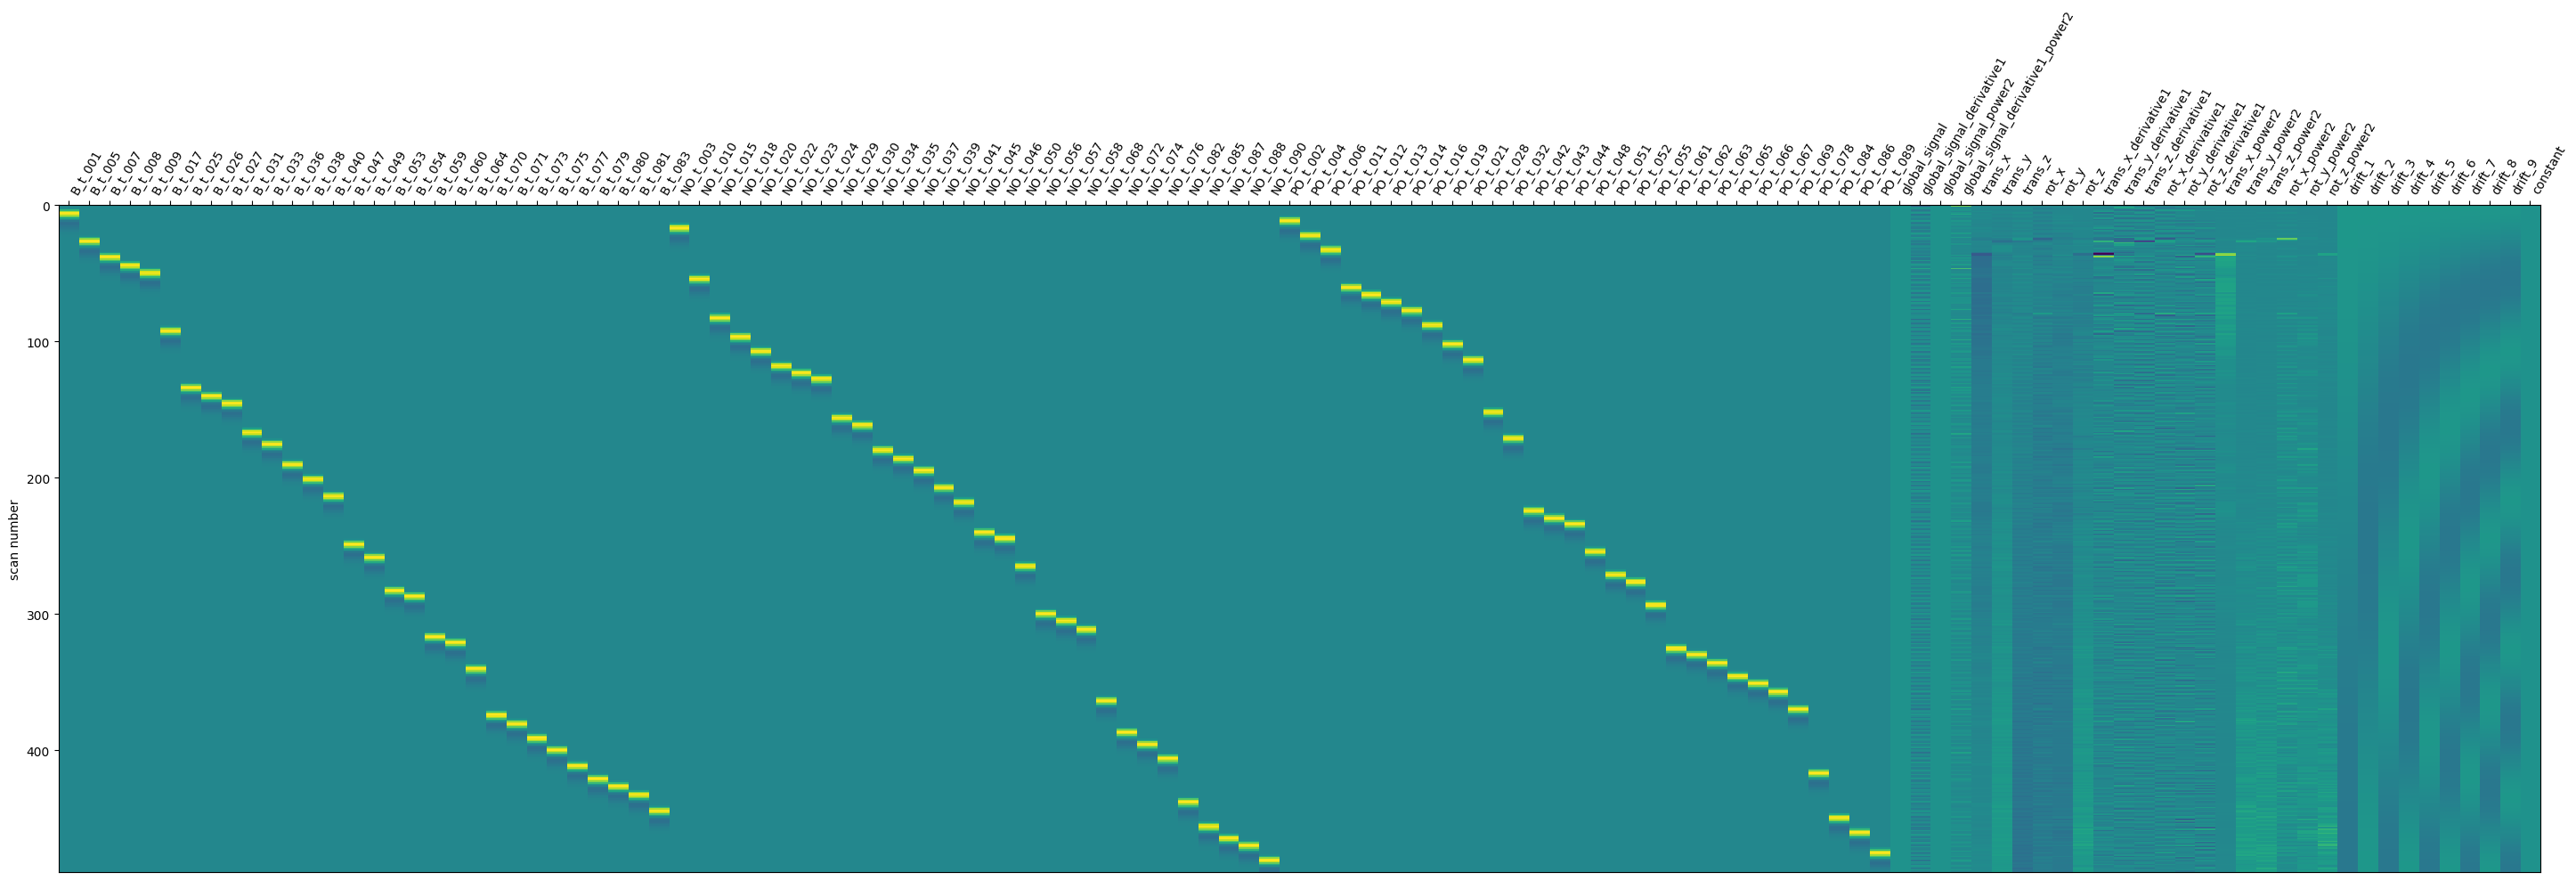

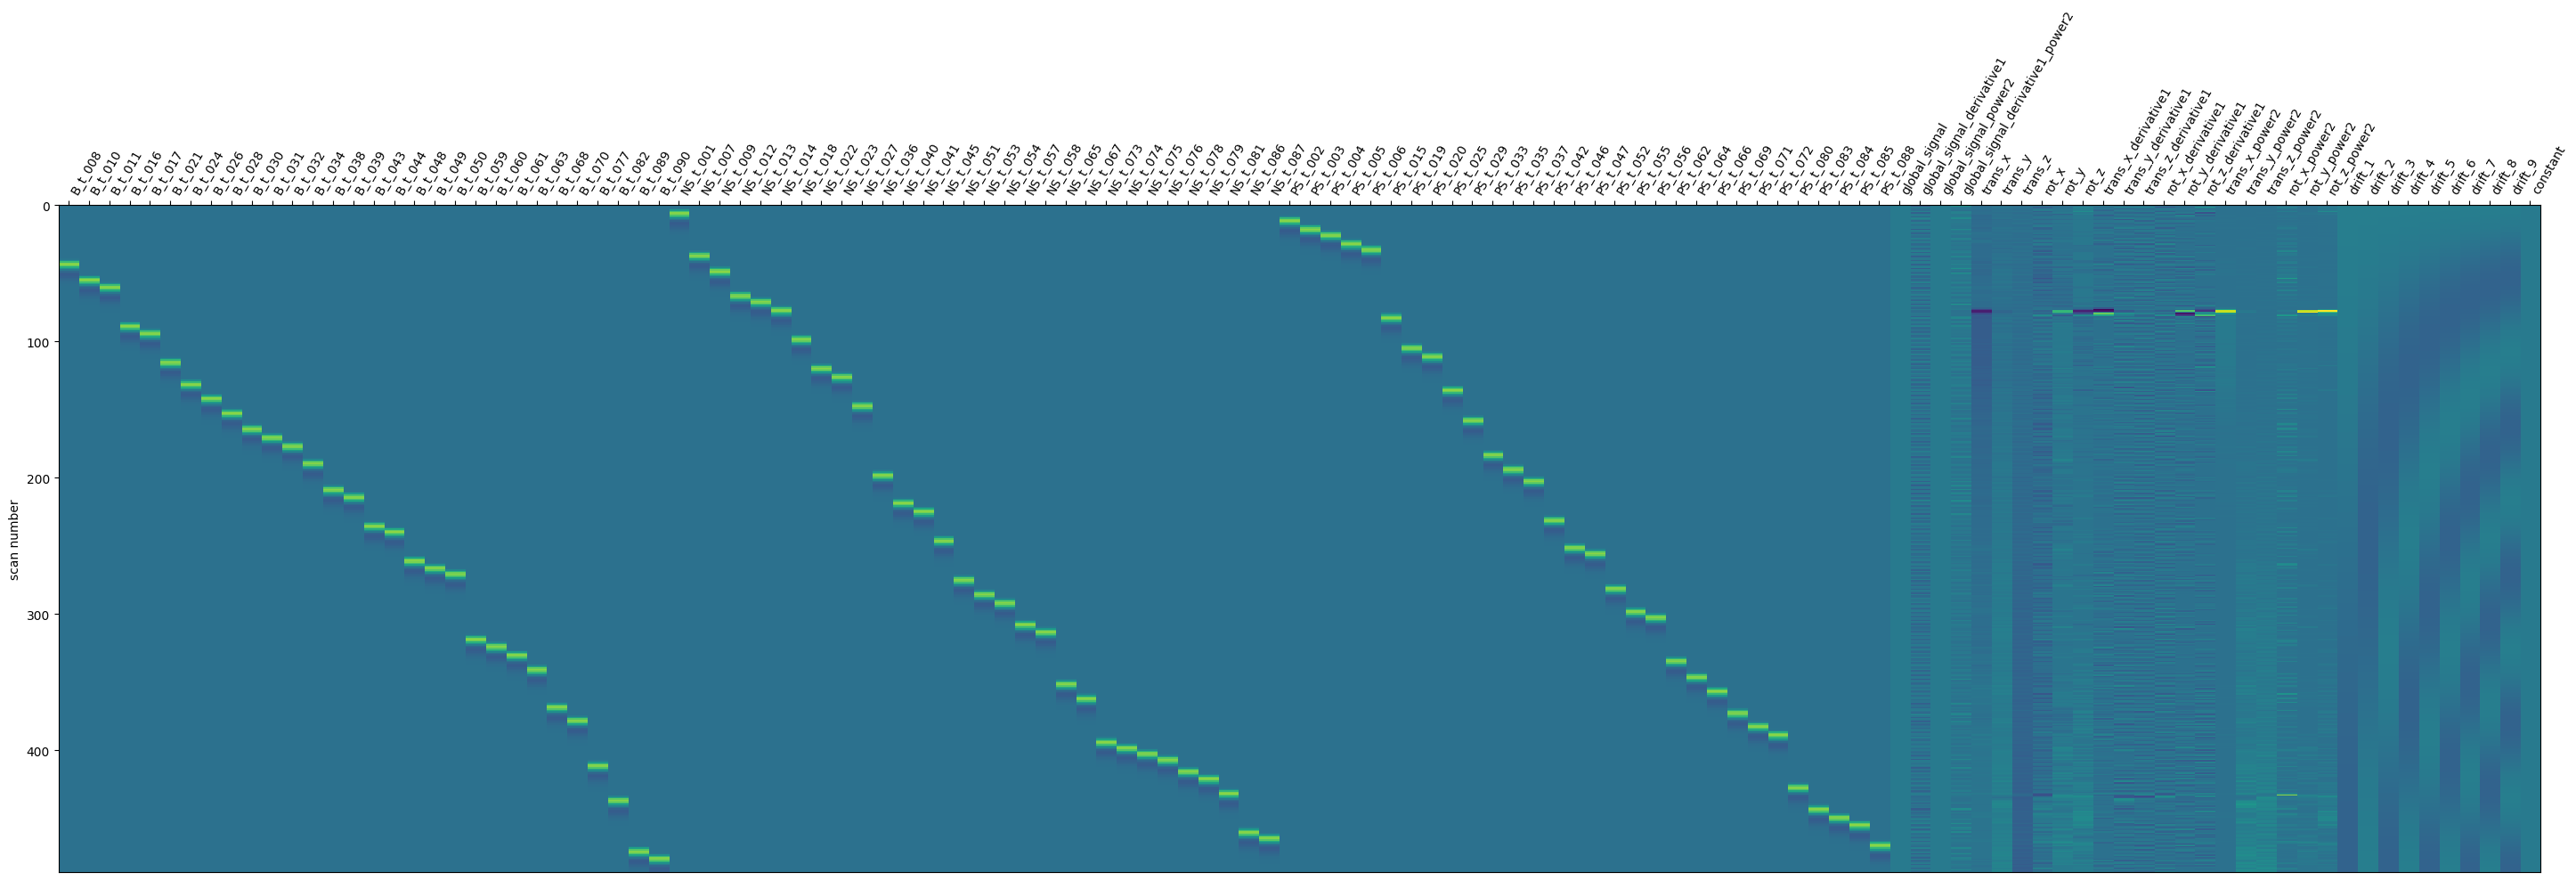

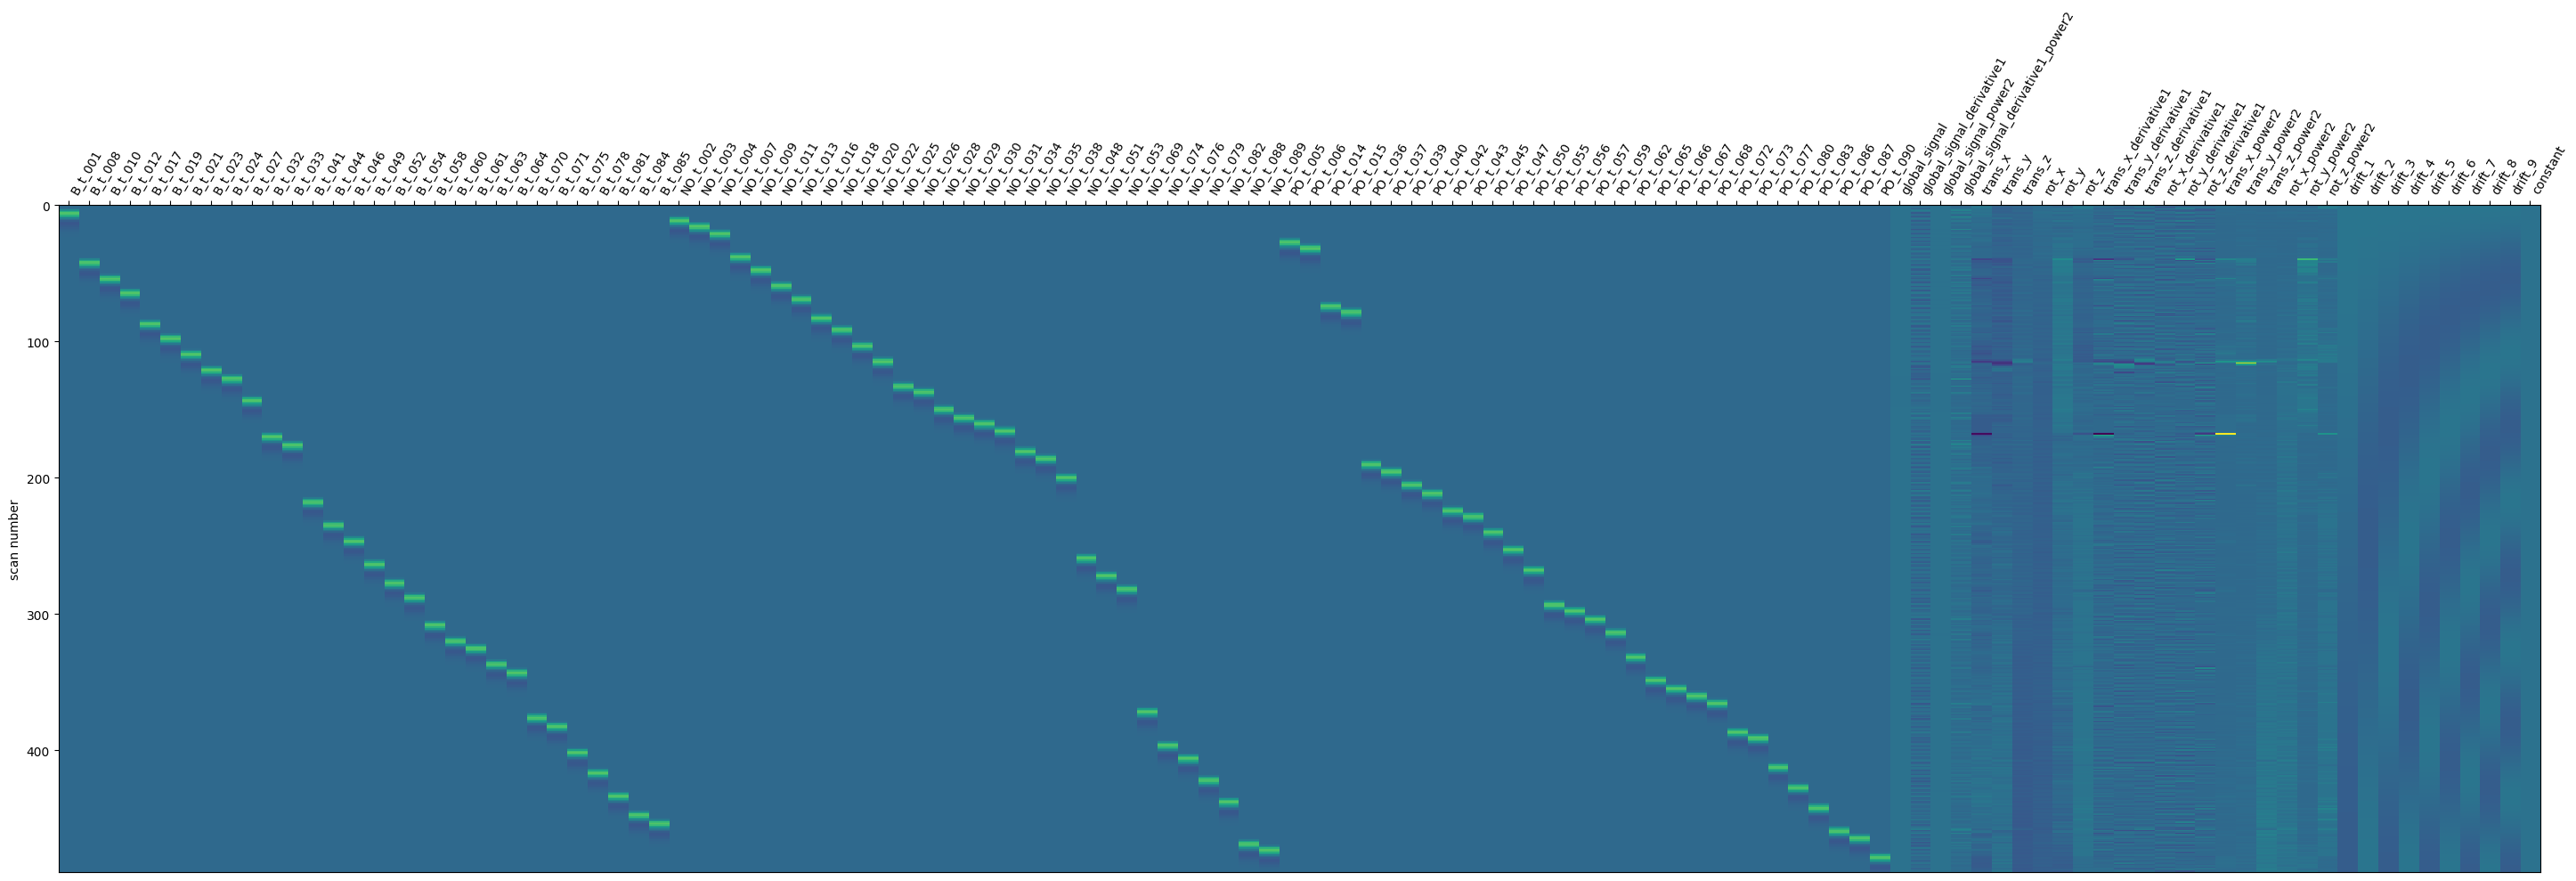

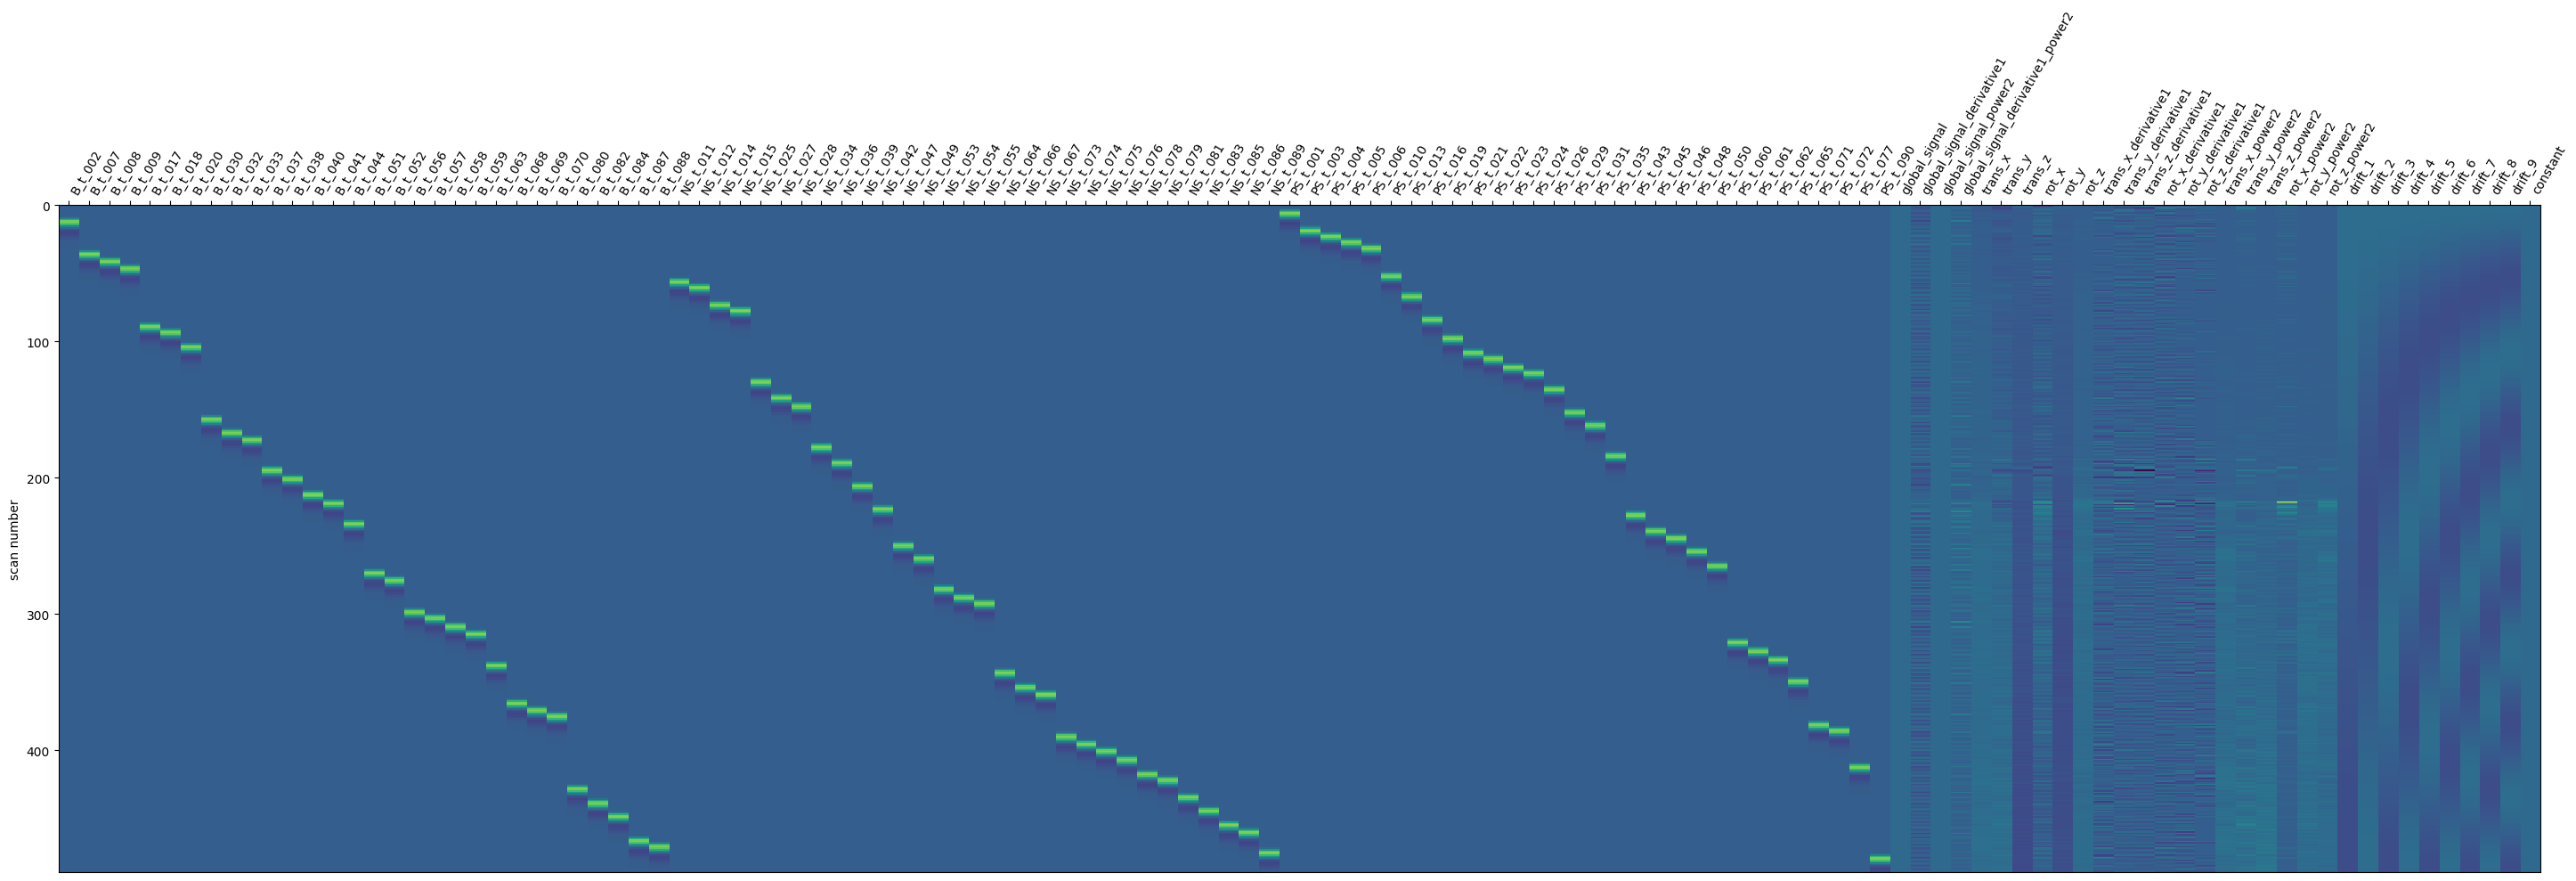

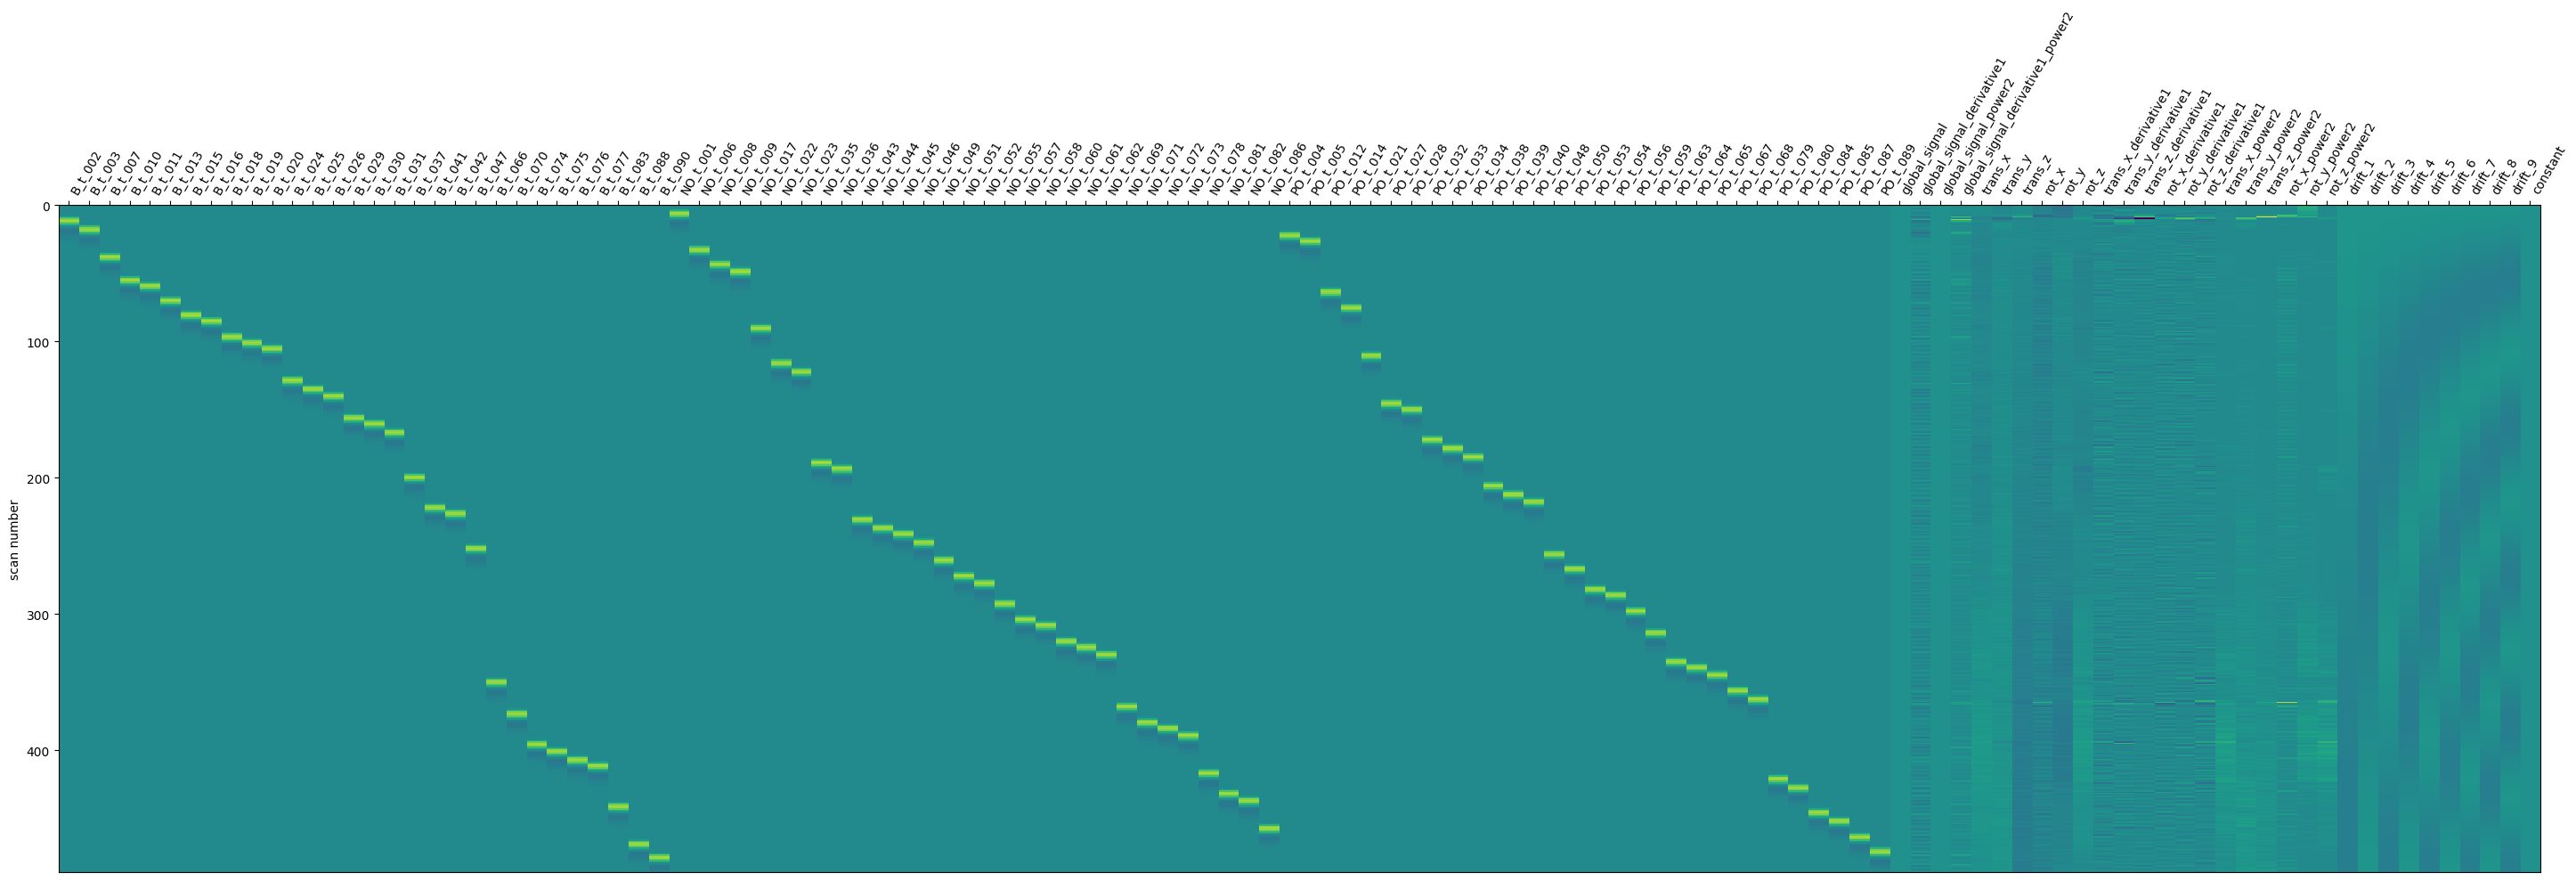

In [46]:
#plot new design matrices
from nilearn.plotting import plot_design_matrix
for ii in range(len(models_events[0])):  # NB participant index
    plot_design_matrix(lsa_dm[ii]);

now = datetime.now()
print('Finishing cell:',now.strftime("%H:%M:%S"))

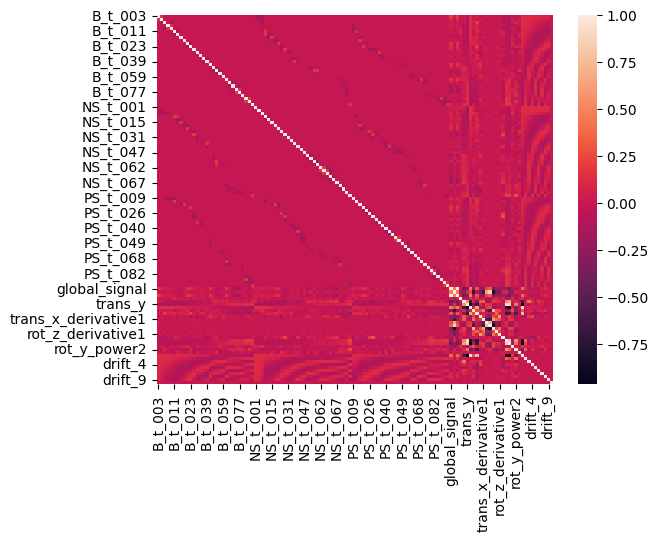

In [47]:
# correlations
import seaborn as sns
dm_corr=lsa_dm[0].corr() #NB participant index
p1 = sns.heatmap(dm_corr)

In [49]:
from nilearn.glm.first_level import FirstLevelModel

model1=[]
for ii in range(len(models_events[0])): # NB participant index
    
    # Get data and model info for our participant, 1st session
    imgs1=models_run_imgs[0][ii]  # NB participant index
    model1.append (FirstLevelModel())
    #Fit the model
    print('Fitting GLM: ', ii+1)
    model1[ii].fit(imgs1,design_matrices=lsa_dm[ii])

now = datetime.now()
print('Finishing model fit:',now.strftime("%H:%M:%S"))

Fitting GLM:  1
Fitting GLM:  2
Fitting GLM:  3
Fitting GLM:  4
Fitting GLM:  5
Fitting GLM:  6
Finishing model fit: 21:50:04


In [50]:
len(models_events[0])

6

In [51]:
model1

[FirstLevelModel(),
 FirstLevelModel(),
 FirstLevelModel(),
 FirstLevelModel(),
 FirstLevelModel(),
 FirstLevelModel()]

In [52]:
import pickle
import pandas

# # Saving the objects:
f = open('/work/sarah_a_folder/ass4/InSpe_first_level_models_our_subject.pkl', 'wb')
pickle.dump([model1, lsa_dm], f)
f.close()

# # Getting back the objects:
# f = open('/work/sarah_a_folder/ass4/InSpe_first_level_models_our_subject.pkl', 'rb')
# model1, lsa_dm = pickle.load(f)
# f.close()

#print(model1[0])
now = datetime.now()
print('Saved model and design matrices:',now.strftime("%H:%M:%S"))

Saved model and design matrices: 21:50:21


In [55]:
# beta map contrast

now = datetime.now()
print('Computing contrasts:',now.strftime("%H:%M:%S"))
b_maps = []
conditions_label = []

# specified our own participant
for ii in range(len(models_events[0])):  # NB participant index
    N=models_events[0][ii].shape[0]  # NB participant index
    #Make an identity matrix with N= number of trials
    contrasts=np.eye(N)
    #print(contrasts.shape)
    #Find difference between columns in design matrix and number of trials
    dif=lsa_dm[ii].shape[1]-contrasts.shape[1]
    #print(dif)
    #Pad with zeros
    contrasts=np.pad(contrasts, ((0,0),(0,dif)),'constant')
    #print(contrasts.shape)
    print('Making contrasts for session : ', ii+1)
    print('Number of contrasts : ', N)
    for i in range(N):
        #Add a beta-contrast image from each trial
        b_maps.append(model1[ii].compute_contrast(contrasts[i,], output_type='effect_size'))
        # Make a variable with condition labels for use in later classification
        conditions_label.append(lsa_dm[ii].columns[i])
#        session_label.append(session)

now = datetime.now()
print('Done computing contrasts:',now.strftime("%H:%M:%S"))

Computing contrasts: 21:52:55
Making contrasts for session :  1
Number of contrasts :  90
Making contrasts for session :  2
Number of contrasts :  90
Making contrasts for session :  3
Number of contrasts :  90
Making contrasts for session :  4
Number of contrasts :  90
Making contrasts for session :  5
Number of contrasts :  90
Making contrasts for session :  6
Number of contrasts :  90
Done computing contrasts: 21:55:41


In [15]:
import pickle

#Save the first level models

# # Saving the objects:
# f = open('/work/sarah_a_folder/ass4/InSpe_first_level_models_all_trials.pkl', 'wb')
# pickle.dump([model1, lsa_dm, conditions_label, b_maps], f)
# f.close()

#Getting back the objects:
f = open('/work/sarah_a_folder/ass4/InSpe_first_level_models_all_trials.pkl', 'rb')
model1, lsa_dm, conditions_label, b_maps = pickle.load(f)
f.close()

now = datetime.now()
print('Saved beta-maps:',now.strftime("%H:%M:%S"))

#del model1 # delete here?

Saved beta-maps: 10:51:37


In [8]:
b_maps

In [16]:
# reshape data
print('Checking that column names for design matrix matches labels')
print(lsa_dm[0].columns[0:9])
print(conditions_label[0:9])

Checking that column names for design matrix matches labels
Index(['B_t_003', 'B_t_004', 'B_t_006', 'B_t_007', 'B_t_008', 'B_t_011',
       'B_t_013', 'B_t_016', 'B_t_017'],
      dtype='object')
['B_t_003', 'B_t_004', 'B_t_006', 'B_t_007', 'B_t_008', 'B_t_011', 'B_t_013', 'B_t_016', 'B_t_017']


In [ ]:
#f = open('/work/MikkelWallentin#6287/InSpe_first_level_models_all_trials.pkl', 'rb')
#model1, lsa_dm, conditions_label, b_maps = pickle.load(f)
#f.close()

In [17]:
# selecting positive and negative trials - change b's to p's here
import numpy as np

now = datetime.now()
print('Renaming labels to N, P, and B:',now.strftime("%H:%M:%S"))

#from nilearn import datasets
from nilearn.image import new_img_like, load_img, index_img, clean_img, concat_imgs
from sklearn.model_selection import train_test_split, GroupKFold
n_trials=len(conditions_label)

#Concatenate beta maps
b_maps_conc=concat_imgs(b_maps)
#print(b_maps_conc.shape)
del b_maps
# Reshaping data------------------------------
from nilearn.image import index_img, concat_imgs

# ------------------------------------------------new
#Find all negative and positive trials
idx_neg=[int(i) for i in range(len(conditions_label)) if 'N' in conditions_label[i]]
idx_pos=[int(i) for i in range(len(conditions_label)) if 'P' in conditions_label[i]]
idx_but=[int(i) for i in range(len(conditions_label)) if 'B' in conditions_label[i]]


idx_oth=[np.zeros(90),np.ones(90),np.zeros(90),np.ones(90),np.zeros(90),np.ones(90)] # times three for all 6 trials
idx_self=[np.ones(90),np.zeros(90),np.ones(90),np.zeros(90),np.ones(90),np.zeros(90)] # check correct order of trials

#print(idx_neg)
#print(conditions_label)
for i in range(len(conditions_label)): 
    if i in idx_neg:
        conditions_label[i]='N'
    if i in idx_pos:
        conditions_label[i]='P'
    if i in idx_but:
        conditions_label[i]='B'
print(conditions_label)

#change to idx_other and self
# for i in range(len(conditions_label)): 
#     if idx_oth[i] == 1:
#         conditions_label[i]='O'
#     if idx_self[i] == 1:
#         conditions_label[i]='S'
#     if i in idx_but:
#         conditions_label[i]='B'
# print(conditions_label)

# -------------------------------- from here on, run the rest separately for each condition


now = datetime.now()
print('Selecting to N and P:',now.strftime("%H:%M:%S"))
# Make index of relevant trials
idx=np.concatenate((idx_neg, idx_pos))
#print(idx)

#Select trials
conditions=np.array(conditions_label)[idx]
print(conditions)

#Select images
b_maps_img = index_img(b_maps_conc, idx)
print(b_maps_img.shape)

Renaming labels to N, P, and B: 10:51:38
['B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B'

In [11]:
len(idx_self)

6

In [20]:
# create training and testing vars on the basis of class labels

now = datetime.now()
print('Making a trial and test set:',now.strftime("%H:%M:%S"))
#conditions_img=conditions[idx]
#print(conditions_img)
#Make an index for spliting fMRI data with same size as class labels
idx2=np.arange(conditions.shape[0])

# create training and testing vars on the basis of class labels
idx_train,idx_test, conditions_train,  conditions_test = train_test_split(idx2,conditions, test_size=0.2)
#print(idx_train, idx_test)

# Reshaping data------------------------------
from nilearn.image import index_img
fmri_img_train = index_img(b_maps_img, idx_train)
fmri_img_test = index_img(b_maps_img, idx_test)
#Check data sizes
print('Trial and test set shape:')
print(fmri_img_train.shape)
print(fmri_img_test.shape)

# Saving the objects:
f = open('/work/sarah_a_folder/ass4/InSpe_first_level_models_testtrain.pkl', 'wb')
pickle.dump([fmri_img_train, fmri_img_test, idx_train,idx_test, conditions_train,  conditions_test], f)
f.close()
now = datetime.now()
print('Trial and test set saved:',now.strftime("%H:%M:%S"))

Making a trial and test set: 10:53:08
Trial and test set shape:
(78, 92, 78, 288)
(78, 92, 78, 72)
Trial and test set saved: 10:53:10


Making a mask for analysis: 11:03:37


/tmp/ipykernel_459/648463301.py:41: UserWarning: Data array used to create a new image contains 64-bit ints. This is likely due to creating the array with numpy and passing `int` as the `dtype`. Many tools such as FSL and SPM cannot deal with int64 in Nifti images, so for compatibility the data has been converted to int32.
  process_mask_img = new_img_like(mask_img, process_mask)


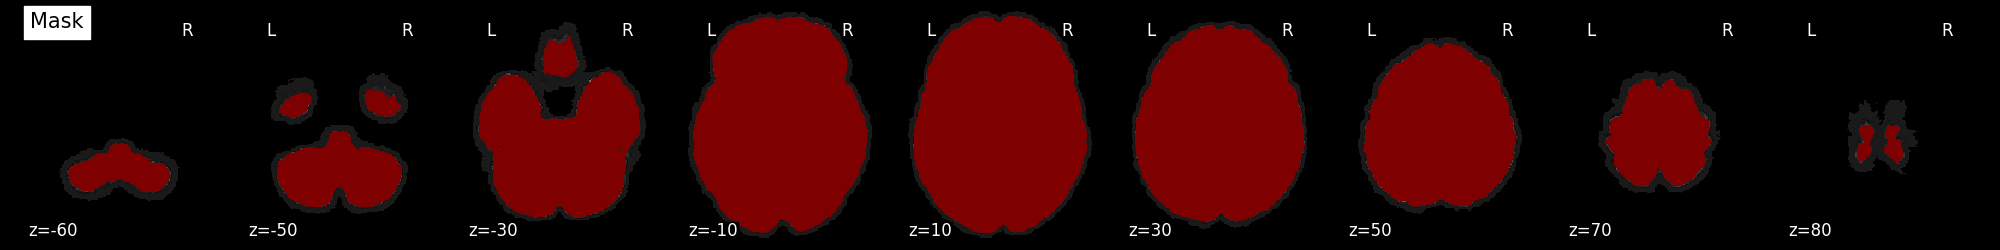

In [3]:
# searchlight analysis

# Additional imports
from datetime import datetime
import matplotlib.pyplot as plt
import pandas as pd
import sys

### IMPORT DATA
import pickle
f = open('/work/sarah_a_folder/ass4/InSpe_first_level_models_testtrain.pkl', 'rb')
fmri_img_train, fmri_img_test, idx_train,idx_test, conditions_train, conditions_test = pickle.load(f)
f.close()

now = datetime.now()
print('Making a mask for analysis:',now.strftime("%H:%M:%S"))
# -------------------
import pandas as pd
import numpy as np
from nilearn.image import new_img_like, load_img
from nilearn.plotting import plot_stat_map, plot_img, show
from nilearn import decoding
from nilearn.decoding import SearchLight
from sklearn import naive_bayes, model_selection #import GaussianNB

#########################################################################
#Make a mask with the whole brain

mask_wb_filename='/work/816119/InSpePosNegData/BIDS_2023E/derivatives/sub-0121/anat/sub-0121_acq-T1sequence_run-1_space-MNI152NLin2009cAsym_desc-brain_mask.nii.gz'
anat_filename='/work/816119/InSpePosNegData/BIDS_2023E/derivatives/sub-0121/anat/sub-0121_acq-T1sequence_run-1_space-MNI152NLin2009cAsym_desc-preproc_T1w.nii.gz'
#Load the whole brain mask
mask_img = load_img(mask_wb_filename)

## This bit can be used if you want to make a smaller select of the brain to study (e.g. to speed up analsysis)
# .astype() makes a copy.
process_mask = mask_img.get_fdata().astype(int)
#Set slices below x in the z-dimension to zero (in voxel space)
process_mask[..., :10] = 0
#Set slices above x in the z-dimension to zero (in voxel space)
process_mask[..., 170:] = 0
process_mask_img = new_img_like(mask_img, process_mask)


#Plot the mask on an anatomical background
plot_img(process_mask_img, bg_img=anat_filename,#bg_img=mean_fmri,
         title="Mask", display_mode="z",cut_coords=[-60,-50,-30,-10,10,30,50,70,80],
         vmin=.40, cmap='jet', threshold=0.9, black_bg=True)

In [4]:
now = datetime.now()
print('Starting searchlight analysis:',now.strftime("%H:%M:%S"))
#n_jobs=-1 means that all CPUs will be used

from nilearn.decoding import SearchLight
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import GaussianNB

# The radius is the one of the Searchlight sphere that will scan the volume
searchlight = SearchLight(
    mask_img,
    estimator=GaussianNB(),
    process_mask_img=process_mask_img,
    radius=5, n_jobs=-1,
    verbose=10, cv=10)
searchlight.fit(fmri_img_train, conditions_train)

now = datetime.now()
print('Finishing searchlight analysis:',now.strftime("%H:%M:%S"))

Starting searchlight analysis: 11:04:08


In [ ]:
import pickle
import nilearn

#Save the searchlight model

# Saving the objects:
f = open('/work/sarah_a_folder/ass4/InSpe_first_level_models_all_trials_searchlight.pkl', 'wb')
pickle.dump([searchlight, searchlight.scores_], f)
f.close()

# Getting back the objects:
#f = open('/work/sarah_a_folder/ass4/InSpe_first_level_models_all_trials_searchlight.pkl', 'rb')
#searchlight,searchlight_scores_ = pickle.load(f)
#f.close()


# Getting back the objects:
#f = open('/work/sarah_a_folder/ass4/InSpe_first_level_models_testtrain.pkl', 'rb')
#fmri_img_train, fmri_img_test, idx_train,idx_test, conditions_train,  conditions_test= pickle.load(f)
#f.close()


now = datetime.now()
print('Searchlight output saved:',now.strftime("%H:%M:%S"))

In [ ]:
#plot results

from nilearn import image, plotting
from nilearn.plotting import plot_glass_brain, plot_stat_map
from nilearn.image import new_img_like, load_img # NB participant index  _____
mask_wb_filename='/work/816119/InSpePosNegData/BIDS_2023E/derivatives/sub-0121/anat/sub-0121_acq-T1sequence_run-1_space-MNI152NLin2009cAsym_desc-brain_mask.nii.gz'
anat_filename='/work/816119/InSpePosNegData/BIDS_2023E/derivatives/sub-0121/anat/sub-0121_acq-T1sequence_run-1_space-MNI152NLin2009cAsym_desc-preproc_T1w.nii.gz'

now = datetime.now()
print('Plotting and saving searchlight output (threshold:0.6):',now.strftime("%H:%M:%S"))

#Create an image of the searchlight scores
searchlight_img = new_img_like(anat_filename, searchlight.scores_)


plot_glass_brain(searchlight_img, cmap='jet',colorbar=True, threshold=0.5,
                          title='negative vs positive (unthresholded)',
                          plot_abs=False)

fig=plotting.plot_glass_brain(searchlight_img,cmap='prism',colorbar=True,threshold=0.60,title='negative vs positive (Acc>0.6')
fig.savefig("/work/sarah_a_folder/ass4/InSpe_neg_vs_but_searchlightNP_glass.png", dpi=300)
#plt.show()

plot_stat_map(searchlight_img, cmap='jet',threshold=0.6, cut_coords=[-30,-20,-10,0,10,20,30],
              display_mode='z',  black_bg=False,
              title='pos vs neg (Acc>0.6)')
plt.show()

In [ ]:
print('Number of voxels in searchlight: ',searchlight.scores_.size)
#Find the percentile that makes the cutoff for the 500 best voxels
perc=100*(1-500.0/searchlight.scores_.size)
#Print percentile
print('Percentile for 500 most predictive voxels: ',perc)
#Find the cutoff
cut=np.percentile(searchlight.scores_,perc)
#Print cutoff
print('Cutoff for 500 most predictive voxels: ', cut)
#cut=0
#Make a mask using cutoff

#Load the whole brain mask
mask_img2 = load_img(mask_wb_filename)

# .astype() makes a copy.
process_mask2 = mask_img2.get_fdata().astype(int)
process_mask2[searchlight.scores_<=cut] = 0
process_mask2_img = new_img_like(mask_img2, process_mask2)

In [ ]:
# --------------
from nilearn import image
from nilearn.plotting import plot_stat_map, plot_img, show
from nilearn import plotting
%matplotlib inline
#Create an image of the searchlight scores
searchlight_img = new_img_like(anat_filename, searchlight.scores_)
#Plot the searchlight scores on an anatomical background
plot_img(searchlight_img, bg_img=anat_filename,#bg_img=mean_fmri,
         title="Searchlight", display_mode="z",cut_coords=[-25,-20,-15,-10,-5,0,5],
         vmin=.40, cmap='jet', threshold=cut, black_bg=True)
#plotting.plot_glass_brain effects
fig=plotting.plot_glass_brain(searchlight_img,threshold=cut)
fig.savefig("/work/sarah_a_folder/ass4/InSpe_neg_vs_pos_searchlightNP_glass_500.png", dpi=300)

now = datetime.now()
print('Saving glass brain with 500 most predictive voxels:',now.strftime("%H:%M:%S"))

In [ ]:
# permutations
now = datetime.now()
print('Perform permutation test on test set using 500 predictive voxels:',now.strftime("%H:%M:%S"))
from sklearn.naive_bayes import GaussianNB
from nilearn.input_data import NiftiMasker
masker = NiftiMasker(mask_img=process_mask2_img, standardize=False)

# We use masker to retrieve a 2D array ready
# for machine learning with scikit-learn
fmri_masked = masker.fit_transform(fmri_img_test)
#Print size of matrix (images x voxels)
print(fmri_masked.shape)

from sklearn.model_selection import permutation_test_score
score_cv_test, scores_perm, pvalue= permutation_test_score(
    GaussianNB(), fmri_masked, conditions_test, cv=10, n_permutations=1000, 
    n_jobs=-1, random_state=0, verbose=0, scoring=None)
print("Classification Accuracy: %s (pvalue : %s)" % (score_cv_test, pvalue))


In [ ]:
import pickle

now = datetime.now()
print('Saving permutation scores:',now.strftime("%H:%M:%S"))
#Save the permutation scores

# Saving the objects:
f = open('/work/sarah_a_folder/ass4/InSpe_first_level_models_all_trials_searchlight_perms.pkl', 'wb')
pickle.dump([score_cv_test, scores_perm, pvalue], f)
f.close()

# Getting back the objects:
#f = open('/work/MikkelWallentin#6287/InSpe_first_level_models_all_trials_searchlight_perms.pkl', 'rb')
#score_cv_test, scores_perm, pvalue = pickle.load(f)
#f.close()

In [ ]:
now = datetime.now()
print('Plotting and saving permutation scores:',now.strftime("%H:%M:%S"))

import numpy as np
import matplotlib.pyplot as plt
#How many classes
n_classes = np.unique(conditions_test).size

plt.hist(scores_perm, 20, label='Permutation scores',
         edgecolor='black')
ylim = plt.ylim()
plt.plot(2 * [score_cv_test], ylim, '--g', linewidth=3,
         label='Classification Score'
         ' (pvalue %s)' % pvalue)
plt.plot(2 * [1. / n_classes], ylim, '--k', linewidth=3, label='Chance level')

plt.ylim(ylim)
plt.legend()
plt.xlabel('Score')

plt.savefig("/work/sarah_a_folder/ass4/InSpe_neg_vs_pos_one_sub_perm.png", dpi=300)
plt.show()